In [1]:
import pandas as pd
date_str = '2021-12-06'

In [2]:
%%time
df_MAG_Sel_wRC = pd.read_csv("../Final-Data/Data-Tables-MAG_" + date_str + "/df_MAG_Sel_wRC.csv", sep='\t')
df_MAG_Sel_wRC
# Sel_MAG_Ref_Cite.ipynb

CPU times: user 2min 26s, sys: 26.1 s, total: 2min 52s
Wall time: 2min 52s


,MAGID,DOI,DocType,Year,Date,JID,ConfSID,ConfInsID,C_all,C10,R,C3,C5
0,2789336,NaN,Journal,2008.0,2008-01-01,2.048520e+08,NaN,NaN,1.0,1.0,13.0,1.0,1.0
1,9552966,NaN,Journal,2005.0,2005-05-01,2.737569e+09,NaN,NaN,0.0,0.0,37.0,0.0,0.0
2,9694411,NaN,Conference,1994.0,1994-01-01,NaN,2.755927e+09,NaN,0.0,0.0,0.0,0.0,0.0
3,14355006,NaN,Repository,2011.0,2011-01-01,3.121261e+09,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,14558443,10.1007/978-3-662-45174-8_28,Conference,2014.0,2014-10-12,NaN,1.131603e+09,4.038532e+06,14.0,14.0,11.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134129183,3215499129,10.1109/ICRERA52334.2021.9598593,NaN,2021.0,2021-09-26,NaN,NaN,NaN,0.0,0.0,14.0,0.0,0.0
134129184,3215845741,10.3389/FCVM.2021.766676,Journal,2021.0,2021-11-24,2.595414e+09,NaN,NaN,0.0,0.0,33.0,0.0,0.0
134129185,3216186450,10.1016/J.IDNOW.2021.11.004,NaN,2021.0,2021-11-24,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
134129186,3216762448,10.1016/J.ISTRUC.2021.10.095,Journal,2022.0,2022-01-01,2.898443e+09,NaN,NaN,0.0,0.0,33.0,0.0,0.0


In [4]:
%%time
df_PMID_NCTID = pd.read_csv('../Clinical-Trials-Jan26-2022-AACT/study_references.txt', sep='|')
df_PMID_NCTID
# Read CT sample.

CPU times: user 2.53 s, sys: 162 ms, total: 2.69 s
Wall time: 2.73 s


,id,nct_id,pmid,reference_type,citation
0,1083033,NCT00789828,30053159.0,derived,"Bissler JJ, Budde K, Sauter M, Franz DN, Zonne..."
1,1083034,NCT00789828,29023494.0,derived,"Sparagana S, Franz DN, Krueger DA, Bissler JJ,..."
2,1083035,NCT00789828,27351628.0,derived,"Franz DN, Belousova E, Sparagana S, Bebin EM, ..."
3,1083036,NCT00789828,26858193.0,derived,"Jóźwiak S, Kotulska K, Berkowitz N, Brechenmac..."
4,1083037,NCT00789828,25682485.0,derived,"Goyer I, Dahdah N, Major P. Use of mTOR inhibi..."
...,...,...,...,...,...
686519,1083028,NCT00789698,26117157.0,derived,"Harvey PD, Siu CO, Ogasa M, Loebel A. Effect o..."
686520,1083029,NCT00789724,25482680.0,derived,"Abbate A, Kontos MC, Abouzaki NA, Melchior RD,..."
686521,1083030,NCT00789737,24356792.0,derived,"Rosenstock J, Rigby SP, Ford DM, Tao B, Chou H..."
686522,1083031,NCT00789750,25054436.0,derived,"Rosenstock J, Truitt KE, Baz-Hecht M, Ford DM,..."


In [5]:
%%time
df_PMID_NCTID_Category = df_PMID_NCTID.groupby(['reference_type'],as_index=False)['id'].agg(
    ['count']).reset_index().sort_values(['count'], ascending=False)
df_PMID_NCTID_Category

CPU times: user 83.9 ms, sys: 3.18 ms, total: 87.1 ms
Wall time: 85.1 ms


,reference_type,count
0,background,480893
1,derived,110577
2,result,95054


In [6]:
df_PMID_NCTID_Sel = df_PMID_NCTID.loc[df_PMID_NCTID['reference_type'] == 'background', :]
df_PMID_NCTID_Sel

,id,nct_id,pmid,reference_type,citation
10,1083043,NCT00789867,10459902.0,background,"Alton EW, Stern M, Farley R, Jaffe A, Chadwick..."
37,1354567,NCT04613648,21430513.0,background,"Kalichman L, Ratmansky M. Underlying pathology..."
41,1083073,NCT00790218,18636149.0,background,"Bar-Yehuda S, Stemmer SM, Madi L, Castel D, Oc..."
43,1083075,NCT00790335,18574272.0,background,"Kearon C, Kahn SR, Agnelli G, Goldhaber S, Ras..."
44,1083076,NCT00790335,16475040.0,background,Kahn SR. The post-thrombotic syndrome: the for...
...,...,...,...,...,...
686501,1083010,NCT00789256,NaN,background,"David P. Schenkein, M., Proteosome Inhibition,..."
686502,1083011,NCT00789256,11090046.0,background,"Cheson BD, Bennett JM, Kantarjian H, Pinto A, ..."
686503,1083012,NCT00789256,NaN,background,Common Terminology Criteria for Adverse Events...
686513,1083022,NCT00789581,28508185.0,background,"Yardley DA, Arrowsmith ER, Daniel BR, Eakle J,..."


In [10]:
df_NCTID_wPMID = df_PMID_NCTID_Sel.loc[pd.notnull(df_PMID_NCTID_Sel['pmid']),:]
df_NCTID_wPMID

,id,nct_id,pmid,reference_type,citation
10,1083043,NCT00789867,10459902.0,background,"Alton EW, Stern M, Farley R, Jaffe A, Chadwick..."
37,1354567,NCT04613648,21430513.0,background,"Kalichman L, Ratmansky M. Underlying pathology..."
41,1083073,NCT00790218,18636149.0,background,"Bar-Yehuda S, Stemmer SM, Madi L, Castel D, Oc..."
43,1083075,NCT00790335,18574272.0,background,"Kearon C, Kahn SR, Agnelli G, Goldhaber S, Ras..."
44,1083076,NCT00790335,16475040.0,background,Kahn SR. The post-thrombotic syndrome: the for...
...,...,...,...,...,...
686498,1083007,NCT00789256,2009369.0,background,"Slingerland JM, Minden MD, Benchimol S. Mutati..."
686500,1083009,NCT00789256,12826635.0,background,"Richardson PG, Barlogie B, Berenson J, Singhal..."
686502,1083011,NCT00789256,11090046.0,background,"Cheson BD, Bennett JM, Kantarjian H, Pinto A, ..."
686513,1083022,NCT00789581,28508185.0,background,"Yardley DA, Arrowsmith ER, Daniel BR, Eakle J,..."


In [11]:
len(df_NCTID_wPMID) / len(df_PMID_NCTID_Sel)

0.9385809317249367

In [13]:
%%time
df_MAG_PubMedID = pd.read_csv("../Final-Data/Data-Tables-MAG_" + date_str + "/df_MAG_ID121PubMedID.csv", sep='\t')
df_MAG_PubMedID
# MAG-Paper-PubMed.ipynb

/home/zla6184/.conda/envs/newcv/lib/python3.9/site-packages/IPython/core/magics/execution.py:1321: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


CPU times: user 8.78 s, sys: 885 ms, total: 9.66 s
Wall time: 9.72 s


,0,2
0,23,22260809
1,290,3738373
2,548,2195785
3,763,11581205
4,1921,8446019
...,...,...
31230201,3026081580,32053780
31230202,3096051705,33140623
31230203,3207782474,34808235
31230204,3195593967,34859247


In [14]:
df_MAG_PubMedID.rename(columns={"0": "MAGID", "2": "PMID"}, inplace=True)
df_MAG_PubMedID

,MAGID,PMID
0,23,22260809
1,290,3738373
2,548,2195785
3,763,11581205
4,1921,8446019
...,...,...
31230201,3026081580,32053780
31230202,3096051705,33140623
31230203,3207782474,34808235
31230204,3195593967,34859247


In [18]:
%%time
df_MAG_PubMedID.PMID = df_MAG_PubMedID.PMID.astype(str)

CPU times: user 2.32 s, sys: 286 ms, total: 2.61 s
Wall time: 2.6 s


In [15]:
df_NCTID_wPMID = df_NCTID_wPMID.copy()
df_NCTID_wPMID.rename(columns={'nct_id':'NCT_ID', 'pmid':'PMID'}, inplace=True)
df_NCTID_wPMID

,id,NCT_ID,PMID,reference_type,citation
10,1083043,NCT00789867,10459902.0,background,"Alton EW, Stern M, Farley R, Jaffe A, Chadwick..."
37,1354567,NCT04613648,21430513.0,background,"Kalichman L, Ratmansky M. Underlying pathology..."
41,1083073,NCT00790218,18636149.0,background,"Bar-Yehuda S, Stemmer SM, Madi L, Castel D, Oc..."
43,1083075,NCT00790335,18574272.0,background,"Kearon C, Kahn SR, Agnelli G, Goldhaber S, Ras..."
44,1083076,NCT00790335,16475040.0,background,Kahn SR. The post-thrombotic syndrome: the for...
...,...,...,...,...,...
686498,1083007,NCT00789256,2009369.0,background,"Slingerland JM, Minden MD, Benchimol S. Mutati..."
686500,1083009,NCT00789256,12826635.0,background,"Richardson PG, Barlogie B, Berenson J, Singhal..."
686502,1083011,NCT00789256,11090046.0,background,"Cheson BD, Bennett JM, Kantarjian H, Pinto A, ..."
686513,1083022,NCT00789581,28508185.0,background,"Yardley DA, Arrowsmith ER, Daniel BR, Eakle J,..."


In [20]:
%%time
df_NCTID_wPMID.PMID = df_NCTID_wPMID.PMID.astype(float).astype(int).astype(str)
df_MAG_NCT = df_MAG_PubMedID.merge(df_NCTID_wPMID[['NCT_ID','PMID']], how='inner', on='PMID')
df_MAG_NCT

CPU times: user 42.3 s, sys: 1.29 s, total: 43.6 s
Wall time: 43.3 s


,MAGID,PMID,NCT_ID
0,5825,23592934,NCT00486187
1,12687,10710805,NCT01402011
2,12687,10710805,NCT00685880
3,12687,10710805,NCT00085722
4,12687,10710805,NCT03515720
...,...,...,...
438215,2110179408,10998730,NCT02487966
438216,3156434758,33871579,NCT05035277
438217,2054020285,6387488,NCT00089414
438218,2406368488,7091625,NCT04750486


In [23]:
len(df_MAG_NCT) / len(df_NCTID_wPMID)

0.970894436111548

In [21]:
len(df_MAG_NCT) / len(df_PMID_NCTID_Sel)

0.9112630044521338

In [24]:
# df_MAG_NCT.to_csv('./Data-Linkage/Link_MAG_PMID_NCTID_ACCT.csv', sep='\t', index=False)

# Read MAG_NCT Link

In [25]:
import pandas as pd
df_MAG_NCT_New = pd.read_csv('./Data-Linkage/Link_MAG_PMID_NCTID_ACCT.csv', sep='\t')
df_MAG_NCT_New

,MAGID,PMID,NCT_ID
0,5825,23592934,NCT00486187
1,12687,10710805,NCT01402011
2,12687,10710805,NCT00685880
3,12687,10710805,NCT00085722
4,12687,10710805,NCT03515720
...,...,...,...
438215,2110179408,10998730,NCT02487966
438216,3156434758,33871579,NCT05035277
438217,2054020285,6387488,NCT00089414
438218,2406368488,7091625,NCT04750486


In [26]:
%%time
df_MAG_NCT_cnt = df_MAG_NCT_New.groupby(['MAGID'],as_index=False)['NCT_ID'].agg(['count']).reset_index().sort_values(['count'], ascending=False)
df_MAG_NCT_cnt
# Counting how many NCTs refer a paper

CPU times: user 141 ms, sys: 7.58 ms, total: 149 ms
Wall time: 147 ms


,MAGID,count
217028,2132322340,146
265952,2253311584,114
65400,1996299251,104
329231,3001118548,103
238100,2151487996,95
...,...,...
122225,2047074132,1
122224,2047073643,1
122223,2047072666,1
122222,2047071958,1


In [27]:
df_MAG_NCT_cnt.rename(columns={'count':'NCT_count'}, inplace=True)
df_MAG_NCT_cnt

,MAGID,NCT_count
217028,2132322340,146
265952,2253311584,114
65400,1996299251,104
329231,3001118548,103
238100,2151487996,95
...,...,...
122225,2047074132,1
122224,2047073643,1
122223,2047072666,1
122222,2047071958,1


In [28]:
# df_MAG_NCT_cnt.to_csv('./Data-Linkage/MAGID_NCTcount_wPMID_AACT.csv', sep='\t', index=False)

# Read MAGID NCT Count

In [29]:
df_MAG_NCT_cnt = pd.read_csv('./Data-Linkage/MAGID_NCTcount_wPMID_AACT.csv', sep='\t')
df_MAG_NCT_cnt

,MAGID,NCT_count
0,2132322340,146
1,2253311584,114
2,1996299251,104
3,3001118548,103
4,2151487996,95
...,...,...
337425,2047074132,1
337426,2047073643,1
337427,2047072666,1
337428,2047071958,1


In [30]:
%%time
df_MAG_NCT_cnt1 = df_MAG_NCT_cnt.groupby(['NCT_count'])['MAGID'].agg(
    ['count']).reset_index().sort_values(['count'], ascending=False)
df_MAG_NCT_cnt1

CPU times: user 16.7 ms, sys: 904 µs, total: 17.6 ms
Wall time: 15.3 ms


,NCT_count,count
0,1,281072
1,2,38103
2,3,9901
3,4,3798
4,5,1709
...,...,...
43,49,1
37,38,1
41,44,1
40,43,1


In [32]:
df_MAG_NCT_cnt1.head(20)

,NCT_count,count
0,1,281072
1,2,38103
2,3,9901
3,4,3798
4,5,1709
5,6,887
6,7,529
7,8,354
8,9,257
9,10,187


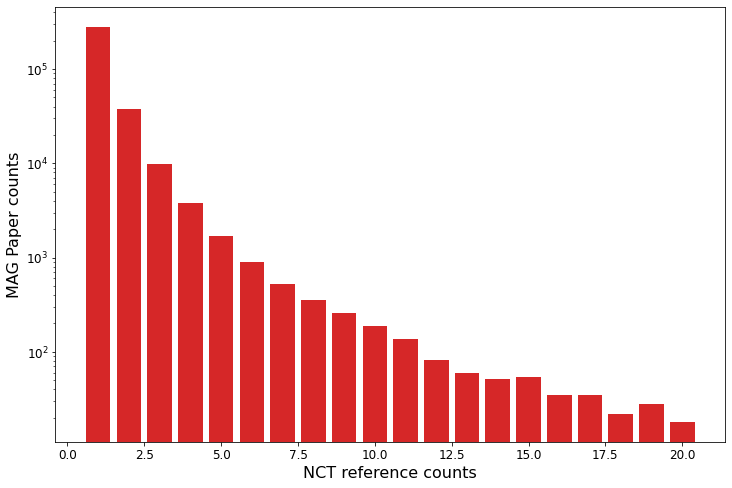

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
colors = [i for i in cm.get_cmap('tab20').colors]
fig, ax1 = plt.subplots(figsize=(12, 8))
# x = np.arange(20) + 1
ax1.bar(df_MAG_NCT_cnt1.head(20)['NCT_count'].values, 
        df_MAG_NCT_cnt1.head(20)['count'].values,
        color=colors[6])
ax1.set_xlabel('NCT reference counts', fontsize=16)
ax1.set_ylabel('MAG Paper counts', fontsize=16)
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
# ax1.set_xscale('log')

# NO PMID Cases

In [8]:
df_NCTID_woPMID = df_PMID_NCTID_Sel.loc[pd.isnull(df_PMID_NCTID_Sel['pmid']),:]
df_NCTID_woPMID

,id,nct_id,pmid,reference_type,citation
127,1083156,NCT00792909,NaN,background,Silfverdal SA et al. Assessment of immunologic...
128,1083157,NCT00792909,NaN,background,Silfverdal SA et al. Immunogenicity/reactogeni...
228,1083258,NCT00796445,NaN,background,Dizier B et al. (2019) A T-helper 1/interferon...
229,1083259,NCT00796562,NaN,background,"Fine J.P. and Gray, R.J. (1999), A proportiona..."
393,1083419,NCT00802919,NaN,background,"Smith R, Amiaz, R,, Tian-Mei S, Maayan L, Jin ..."
...,...,...,...,...,...
686399,1082907,NCT00785707,NaN,background,"Kühn-Inacker H, Weichbold V, Tsaikpini L, Coni..."
686472,1082980,NCT00788151,NaN,background,Crevat D. Immunogenicity and safety of tetrava...
686499,1083008,NCT00789256,NaN,background,"Yang, H.H., et al., A phase I/II study of comb..."
686501,1083010,NCT00789256,NaN,background,"David P. Schenkein, M., Proteosome Inhibition,..."


In [22]:
len(df_NCTID_woPMID) / len(df_PMID_NCTID_Sel)

0.06141906827506327

In [9]:
df_NCTID_woPMID.head(5)['citation'].values

array(['Silfverdal SA et al. Assessment of immunological memory following PHiD-CV immunisation according to 2+1 or 3+1 schedules in the first year of life. Abstract presented at the 7th International Symposium on Pneumococci and Pneumococcal Diseases (ISPPD). Tel Aviv, Israel, 14-18 March 2010.',
       'Silfverdal SA et al. Immunogenicity/reactogenicity of 2-dose catch-up vaccination with 10-valent pneumococcal non-typeable Haemophilus influenzae protein-D conjugate vaccine (PHiD-CV) during fourth year of life. Abstract presented at the 8th Biennial International Symposium on Pneumococci & Pneumococcal Diseases (ISPPD), Foz de Iguaçu, Brazil, 11-15 March 2012.',
       'Dizier B et al. (2019) A T-helper 1/interferon-ϒ gene signature is prognostic in the adjuvant setting of resectable high-risk melanoma but not in non-small cell lung cancer. Clin Cancer Res. pii: clincanres.3717.2018. doi: 10.1158/1078-0432.CCR-18-3717. [Epub ahead of print].',
       'Fine J.P. and Gray, R.J. (1999), 

In [12]:
df_NCTID_woPMID.tail(5)['citation'].values

array(["Kühn-Inacker H, Weichbold V, Tsaikpini L, Coninx F, D'Hease P. (2003) LittlEARS Hörfragebogen - Handanweisung. MED-EL Headquarters, Innsbruck, Austria.",
       'Crevat D. Immunogenicity and safety of tetravalent dengue vaccine in healthy Peruvian children aged 2 to 11 years, previously-vaccinated against yellow fever. A re-emerging challenge in the Americas: opportunities for dengue research collaboration Conference. Feb 15-18, 2011; San Juan, Puerto Rico.',
       'Yang, H.H., et al., A phase I/II study of combination treatment with bortezomib and melphalan (Vc+M) in patients with relapsed or refractory multiple myeloma (MM). Proceedings of ASCO, 2003. Abstract 2340.',
       'David P. Schenkein, M., Proteosome Inhibition, D. Jeffrey A. Bubis, Editor. 2003:Lebanon, New Hampshire.',
       'Common Terminology Criteria for Adverse Events. 2003, National Cancer Institute Cancer Therapy Evaluation Program.'],
      dtype=object)